# **Comparison Random Forest & XGBoost Model for Task Classification**

In [ ]:
!pip install rfpimp

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

## **Data Preparation**

In [ ]:
url = 'https://drive.google.com/uc?id=1eRWXi6IQRTDoKUgT9-Y_RlFG9cbNN6Oq'
df = pd.read_csv(url)
df

,Kabupaten/Kota,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-Rata Lama Sekolah,Pengeluaran Per Kapita,IPM,IPM Class
0,Kabupaten Pacitan,74.58,12.68,7.88,9681,70.94,Tinggi
1,Kabupaten Ponorogo,75.07,13.77,7.78,10658,73.18,Tinggi
2,Kabupaten Trenggalek,75.16,12.62,7.90,10465,71.96,Tinggi
3,Kabupaten Tulungagung,74.99,13.34,8.66,11565,74.65,Tinggi
4,Kabupaten Blitar,75.12,12.65,7.83,11499,72.84,Tinggi
...,...,...,...,...,...,...,...
114,Kota Jakarta Selatan,76.02,13.66,11.75,24975,86.71,Sangat Tinggi
115,Kota Jakarta Timur,75.37,14.06,11.88,18712,84.26,Sangat Tinggi
116,Kota Jakarta Pusat,76.34,13.29,11.54,18202,83.29,Sangat Tinggi
117,Kota Jakarta Barat,75.81,12.87,11.23,21709,83.85,Sangat Tinggi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kabupaten/Kota          119 non-null    object 
 1   Umur Harapan Hidup      119 non-null    float64
 2   Harapan Lama Sekolah    119 non-null    float64
 3   Rata-Rata Lama Sekolah  119 non-null    float64
 4   Pengeluaran Per Kapita  119 non-null    int64  
 5   IPM                     119 non-null    float64
 6   IPM Class               119 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.6+ KB


In [ ]:
df.isnull().sum()

Kabupaten/Kota            0
Umur Harapan Hidup        0
Harapan Lama Sekolah      0
Rata-Rata Lama Sekolah    0
Pengeluaran Per Kapita    0
IPM                       0
IPM Class                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## **EDA**

### IPM Class Distribution


Distribution of IPM Class :
IPM Class
Tinggi           83
Sangat Tinggi    24
Sedang           12
Name: count, dtype: int64


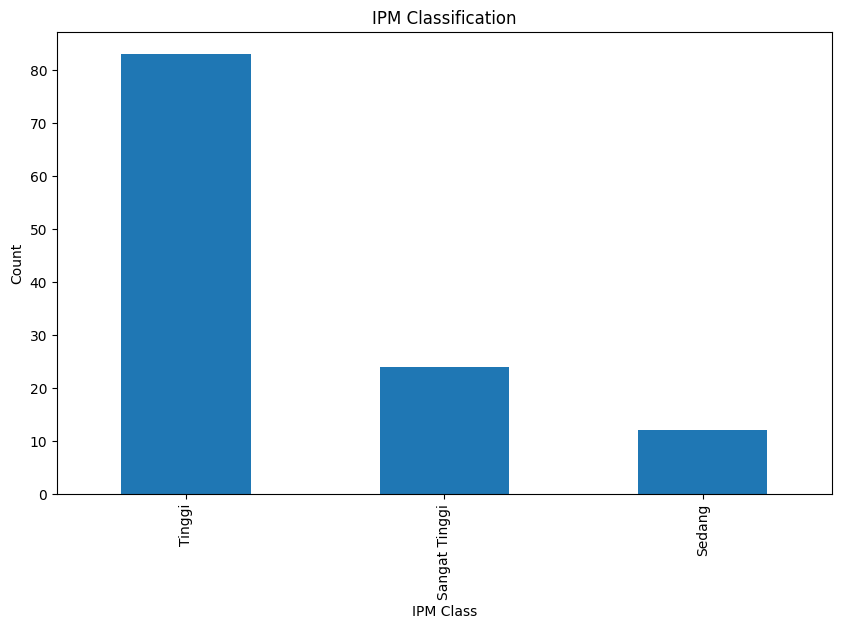

In [ ]:
print('\nDistribution of IPM Class :')
print(df['IPM Class'].value_counts())

plt.figure(figsize=(10, 6))
df['IPM Class'].value_counts().plot(kind='bar')
plt.title('IPM Classification')
plt.xlabel('IPM Class')
plt.ylabel('Count')
plt.show()

### IPM Class Distribution in Pie Chart

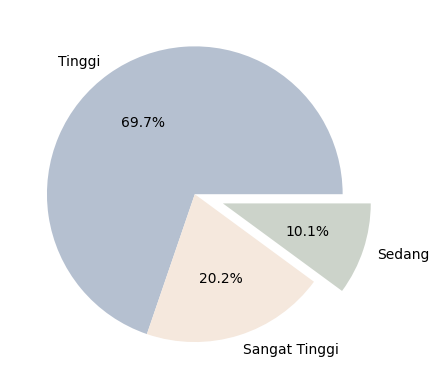


Distribution of IPM Classification:
IPM Class
Tinggi           83
Sangat Tinggi    24
Sedang           12
Name: count, dtype: int64


In [ ]:
y_axis = df['IPM Class'].value_counts()
my_labels = ['Tinggi','Sangat Tinggi','Sedang']
color = ['#B5C0D0', '#F5E8DD', '#CCD3CA', '#EED3D9']
explode = [0, 0, 0.2]

plt.pie(y_axis, labels=my_labels, explode=explode,
        colors=color, autopct='%1.1f%%')
plt.show()

print('\nDistribution of IPM Classification:')
print(df['IPM Class'].value_counts())

### Visualize Kabupaten/Kota "Sedang"

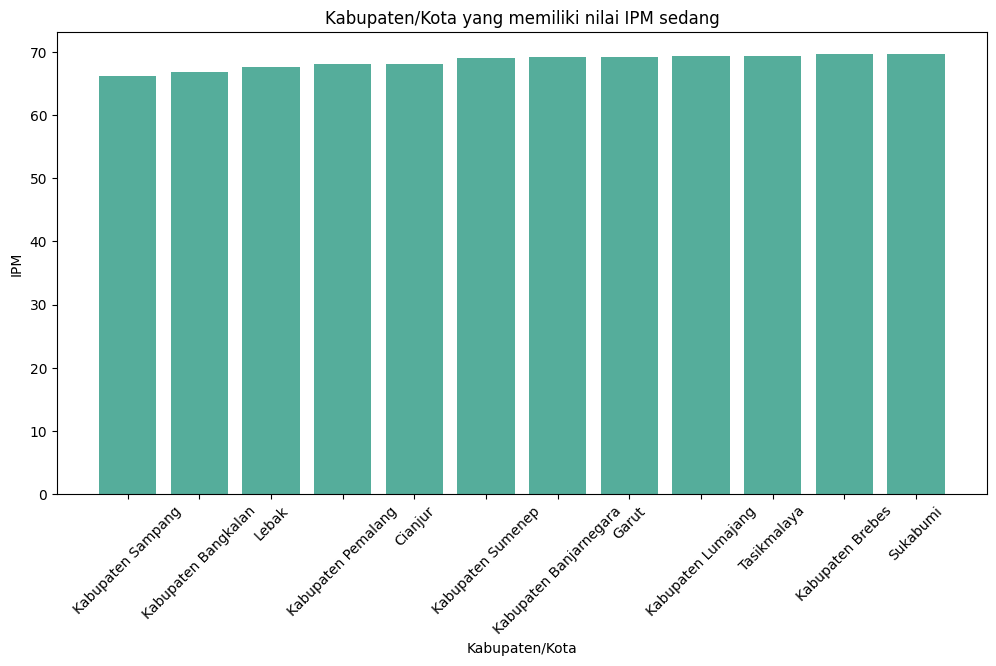

In [ ]:
kota_sedang = df.loc[df["IPM Class"] == "Sedang"].sort_values(by='IPM', ascending=True)
y_a = kota_sedang["IPM"]
x_a = kota_sedang["Kabupaten/Kota"]
bar_colors = '#55AD9B'

plt.figure(figsize=(12, 6))
plt.bar(x_a, y_a, color=bar_colors)
plt.title('Kabupaten/Kota yang memiliki nilai IPM sedang')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('IPM')
plt.xticks(rotation=45)
plt.show()

### IPM Distribution

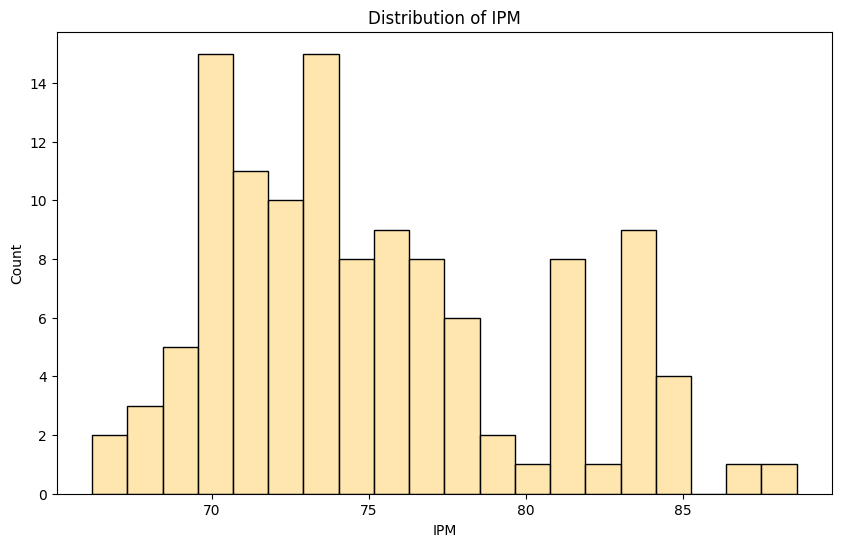

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IPM'], color='#FFDE95', bins=20)
plt.title('Distribution of IPM')
plt.xlabel('IPM')
plt.ylabel('Count')
plt.show()

### Visualize Features Correlation with Heatmap

<Axes: >

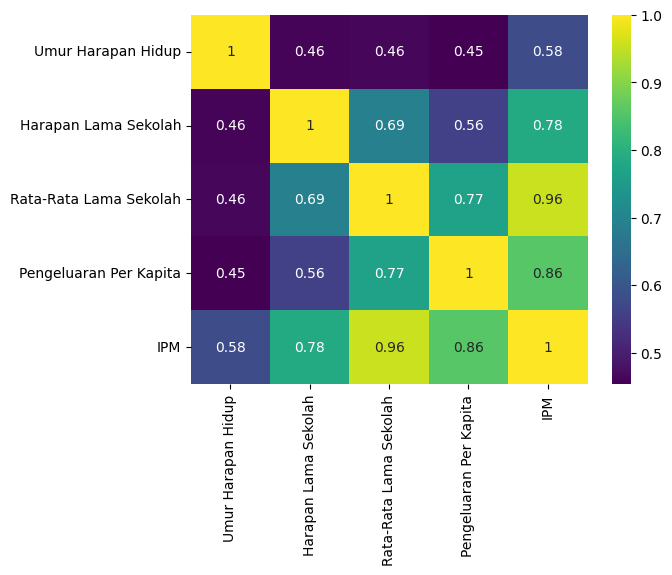

In [ ]:
sns.heatmap(df[["Umur Harapan Hidup", "Harapan Lama Sekolah",
                "Rata-Rata Lama Sekolah", "Pengeluaran Per Kapita", "IPM"]].corr(), annot=True, cmap="viridis")

In [ ]:
# How many of these values are there

df['IPM Class'].value_counts()

IPM Class
Tinggi           83
Sangat Tinggi    24
Sedang           12
Name: count, dtype: int64

Merubah string di IPM Class menjadi integer sesuai dengan `map_legend`.

In [ ]:
# 0 = Sangat Tinggi / 1 = Tinggi / 2 = Sedang
map_legend = {
    'Sangat Tinggi' : 0,
    'Tinggi' : 1,
    'Sedang' : 2
}

df["IPM Class"] = df["IPM Class"].map(map_legend)

In [ ]:
df['IPM Class'].value_counts()

IPM Class
1    83
0    24
2    12
Name: count, dtype: int64

In [ ]:
# Daftar kolom yang akan dihapus
columns_to_drop = ['IPM Class', 'Kabupaten/Kota', 'IPM']

# Menghapus kolom yang ditentukan
X = df.drop(columns=columns_to_drop)

In [ ]:
X.head()

,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-Rata Lama Sekolah,Pengeluaran Per Kapita
0,74.58,12.68,7.88,9681
1,75.07,13.77,7.78,10658
2,75.16,12.62,7.90,10465
3,74.99,13.34,8.66,11565
4,75.12,12.65,7.83,11499


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from xgboost import XGBClassifier

In [ ]:
y = df["IPM Class"]

# I divide the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


# Scaling the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's see the latest data quantities
print("X_train_scaled shape:",X_train.shape)
print("X_test_scaled shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train_scaled shape: (95, 4)
X_test_scaled shape: (24, 4)
y_train shape: (95,)
y_test shape: (24,)


## Training Model

Data dibagi menjadi 5 bagian dengan Stratified K-fold

https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e

In [ ]:
skf = StratifiedKFold(n_splits=5)

kfold_split = list(skf.split(X, y))

In [ ]:
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{df["IPM Class"].value_counts() / len(df)}\n\n')
for n,(train_index,test_index) in enumerate(kfold_split):
    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{df.iloc[test_index,6].value_counts() / len(df.iloc[test_index,6])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{df.iloc[train_index,6].value_counts() / len(df.iloc[train_index,6])}\n\n')

PROPORTION OF TARGET IN THE ORIGINAL DATA
IPM Class
1    0.697479
0    0.201681
2    0.100840
Name: count, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
IPM Class
1    0.708333
0    0.208333
2    0.083333
Name: count, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
IPM Class
1    0.694737
0    0.200000
2    0.105263
Name: count, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
IPM Class
1    0.708333
0    0.208333
2    0.083333
Name: count, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
IPM Class
1    0.694737
0    0.200000
2    0.105263
Name: count, dtype: float64


SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
IPM Class
1    0.708333
0    0.208333
2    0.083333
Name: count, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
IPM Class
1    0.694737
0    0.200000
2    0.105263
Name: count, dtype: float64

### Random Forest


Feature importance untuk random forest berdasarkan https://explained.ai/rf-importance/index.html.

SPLIT ke - 1
Akurasi   : 83.3333%
Precision : 72.7778%
Recall    : 77.4510%
F1 score  : 73.6111%



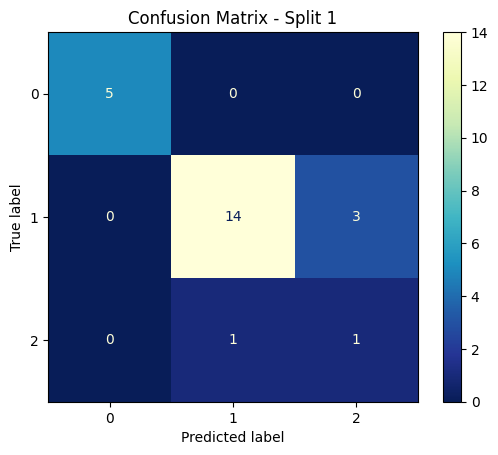

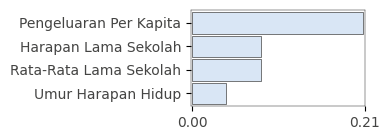

SPLIT ke - 2
Akurasi   : 95.8333%
Precision : 98.1481%
Recall    : 83.3333%
F1 score  : 87.9365%



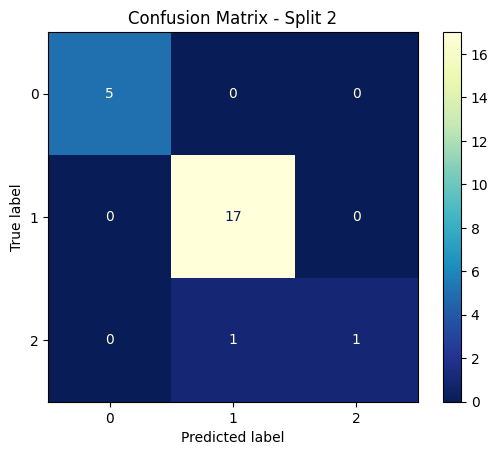

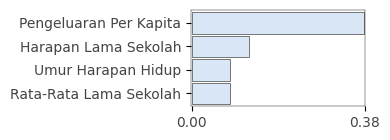

SPLIT ke - 3
Akurasi   : 91.6667%
Precision : 96.4912%
Recall    : 76.6667%
F1 score  : 83.3333%



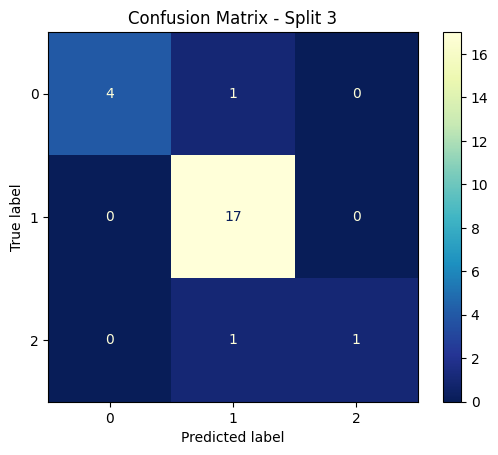

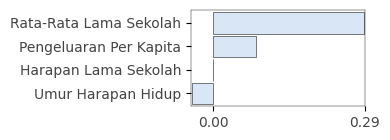

SPLIT ke - 4
Akurasi   : 91.6667%
Precision : 96.2963%
Recall    : 77.7778%
F1 score  : 81.3725%



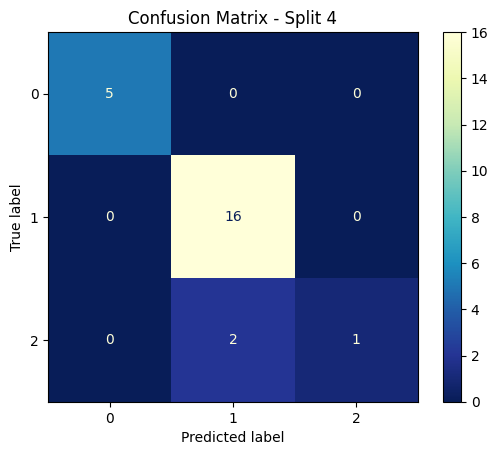

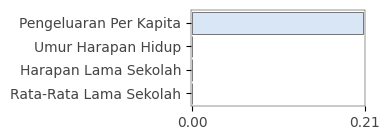

SPLIT ke - 5
Akurasi   : 69.5652%
Precision : 76.3533%
Recall    : 67.3611%
F1 score  : 62.4668%



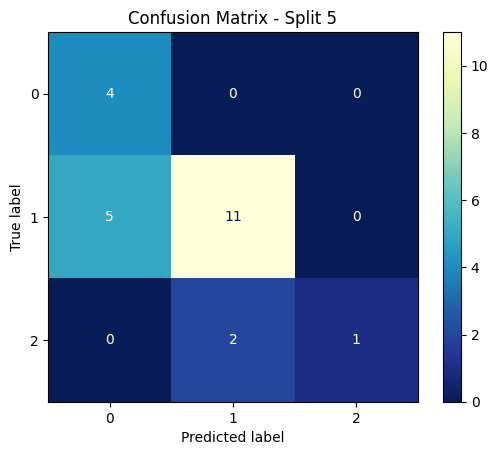

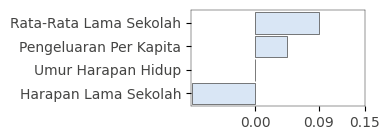

,Iteration,Accuracy,Precision,Recall,F1 score
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,0.864130,0.880133,0.765180,0.777441
std,1.581139,0.104556,0.123620,0.057614,0.099846
min,1.000000,0.695652,0.727778,0.673611,0.624668
25%,2.000000,0.833333,0.763533,0.766667,0.736111
50%,3.000000,0.916667,0.962963,0.774510,0.813725
75%,4.000000,0.916667,0.964912,0.777778,0.833333
max,5.000000,0.958333,0.981481,0.833333,0.879365


In [ ]:
from rfpimp import *

skf_score = []
skf_imps = []
for i, (train_index, test_index) in enumerate(kfold_split):
    print(f"SPLIT ke - {i+1}")
    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

    clf = RandomForestClassifier(max_depth=5, random_state=0)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi   : {accuracy * 100:.4f}%")

    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision : {precision * 100:.4f}%")

    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall    : {recall * 100:.4f}%")

    f1_value = f1_score(y_test, y_pred, average="macro")
    print(f"F1 score  : {f1_value * 100:.4f}%")
    skf_score.append([i+1, accuracy, precision, recall, f1_value])
    print()

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="YlGnBu_r")
    plt.title(f"Confusion Matrix - Split {i+1}")
    plt.show()

    # Plot importance score
    print()
    imp = importances(model=clf, X_valid=X_test, y_valid=y_test)
    skf_imps.append(imp.T)
    viz = plot_importances(imp)
    viz.view()

skf_rf = pd.DataFrame(skf_score, columns=["Iteration", "Accuracy", "Precision", "Recall", "F1 score"])
skf_rf.describe()

In [ ]:
pd.concat(skf_imps).describe()

Feature,Pengeluaran Per Kapita,Harapan Lama Sekolah,Rata-Rata Lama Sekolah,Umur Harapan Hidup
count,5.000000,5.000000,5.000000,5.000000
mean,0.183696,0.024275,0.109058,0.016667
std,0.129947,0.082438,0.108457,0.047507
min,0.043478,-0.086957,0.000000,-0.041667
25%,0.083333,0.000000,0.083333,0.000000
50%,0.208333,0.000000,0.083333,0.000000
75%,0.208333,0.083333,0.086957,0.041667
max,0.375000,0.125000,0.291667,0.083333


### Random Forest + Oversampling (metode ADASYN)

SPLIT ke - 1
Akurasi   : 91.6667%
Precision : 83.3333%
Recall    : 96.0784%
F1 score  : 86.8056%



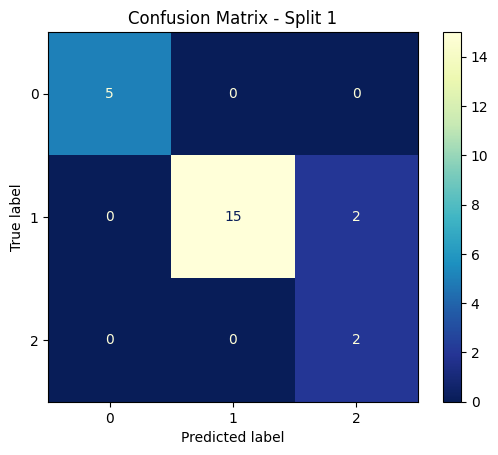

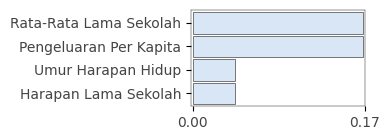

SPLIT ke - 2
Akurasi   : 91.6667%
Precision : 81.3725%
Recall    : 81.3725%
F1 score  : 81.3725%



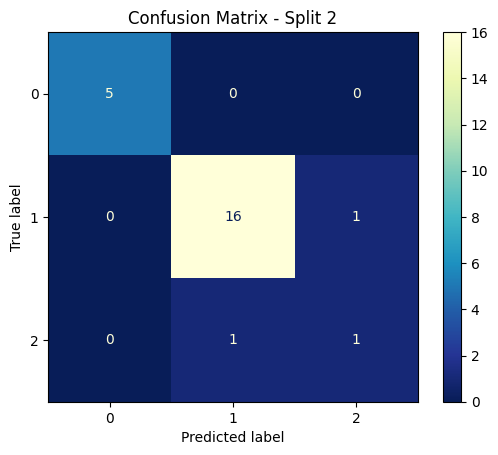

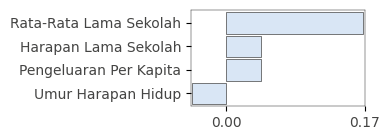

SPLIT ke - 3
Akurasi   : 91.6667%
Precision : 96.4912%
Recall    : 76.6667%
F1 score  : 83.3333%



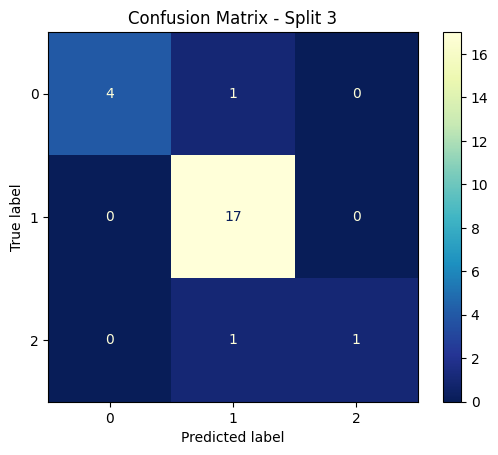

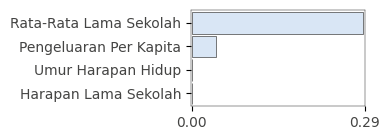

SPLIT ke - 4
Akurasi   : 91.6667%
Precision : 86.8056%
Recall    : 86.8056%
F1 score  : 86.8056%



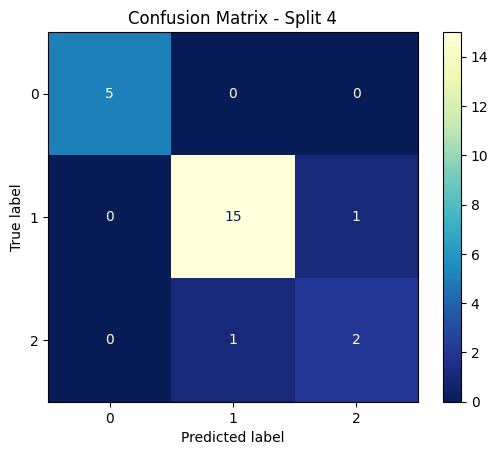

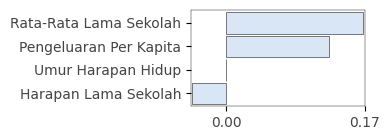

SPLIT ke - 5
Akurasi   : 78.2609%
Precision : 81.2698%
Recall    : 71.5278%
F1 score  : 68.8661%



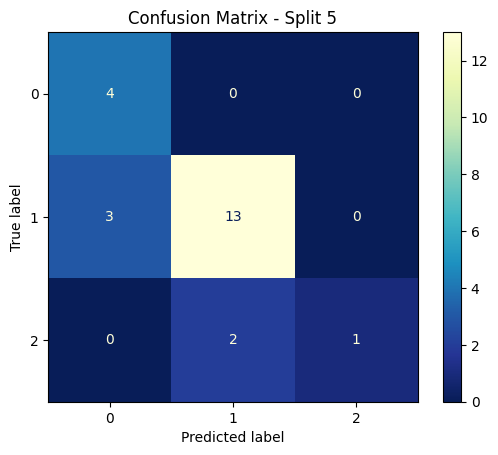

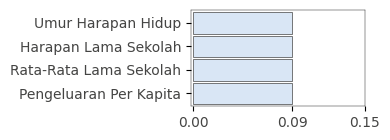

,Iteration,Accuracy,Precision,Recall,F1 score
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,0.889855,0.858545,0.824902,0.814366
std,1.581139,0.059953,0.063543,0.094684,0.074039
min,1.000000,0.782609,0.812698,0.715278,0.688661
25%,2.000000,0.916667,0.813725,0.766667,0.813725
50%,3.000000,0.916667,0.833333,0.813725,0.833333
75%,4.000000,0.916667,0.868056,0.868056,0.868056
max,5.000000,0.916667,0.964912,0.960784,0.868056


In [ ]:
from rfpimp import *

skf_score = []
skf_imps = []
for i, (train_index, test_index) in enumerate(kfold_split):
    print(f"SPLIT ke - {i+1}")
    ros = ADASYN(random_state=0)

    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

    X_train, y_train = ros.fit_resample(X_train, y_train)

    clf = RandomForestClassifier(max_depth=5, random_state=0)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi   : {accuracy * 100:.4f}%")

    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision : {precision * 100:.4f}%")

    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall    : {recall * 100:.4f}%")

    f1_value = f1_score(y_test, y_pred, average="macro")
    print(f"F1 score  : {f1_value * 100:.4f}%")
    skf_score.append([i+1, accuracy, precision, recall, f1_value])
    print()

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="YlGnBu_r")
    plt.title(f"Confusion Matrix - Split {i+1}")
    plt.show()

    # Plot importance score
    print()
    imp = importances(model=clf, X_valid=X_test, y_valid=y_test)
    skf_imps.append(imp.T)
    viz = plot_importances(imp)
    viz.view()

skf_ov = pd.DataFrame(skf_score, columns=["Iteration", "Accuracy", "Precision", "Recall", "F1 score"])
skf_ov.describe()

<Axes: xlabel='Feature'>

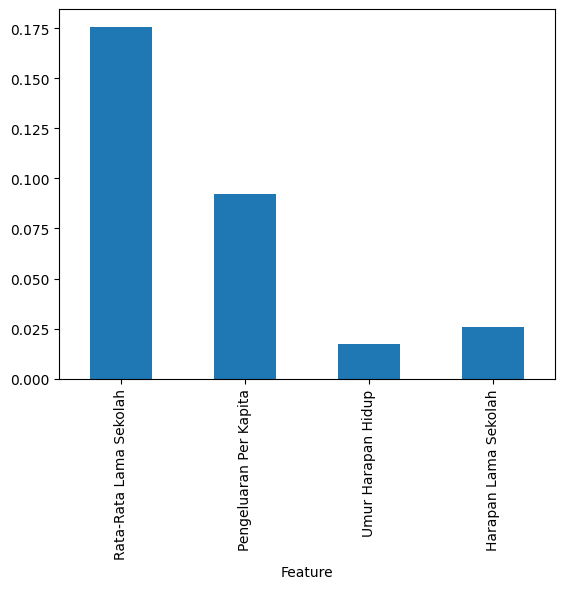

In [ ]:
pd.concat(skf_imps).mean().plot.bar()

### XGboost Classification

In [ ]:
X.columns

Index(['Umur Harapan Hidup', 'Harapan Lama Sekolah', 'Rata-Rata Lama Sekolah',
       'Pengeluaran Per Kapita'],
      dtype='object')

SPLIT ke - 1
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



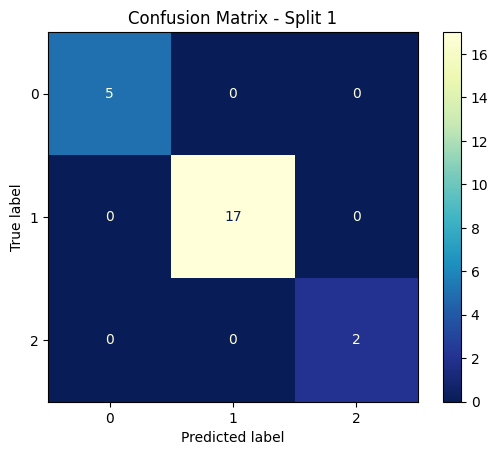

SPLIT ke - 2
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



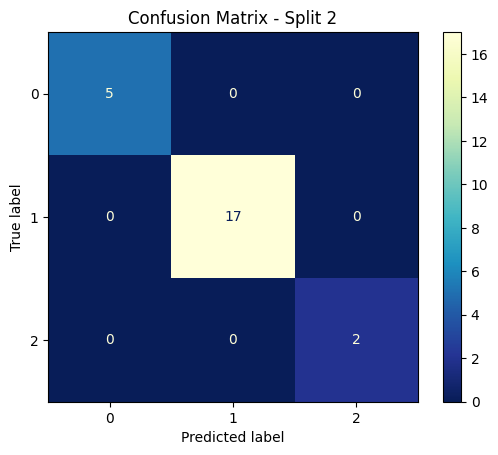

SPLIT ke - 3
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



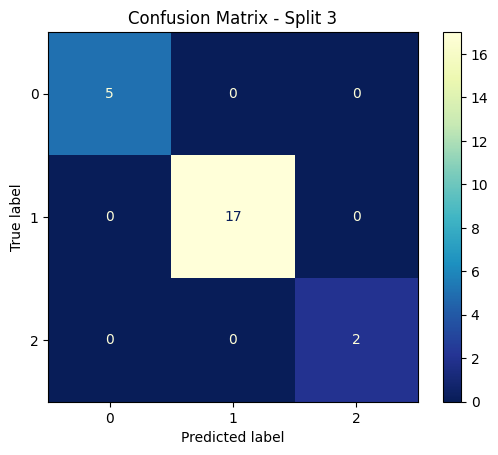

SPLIT ke - 4
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



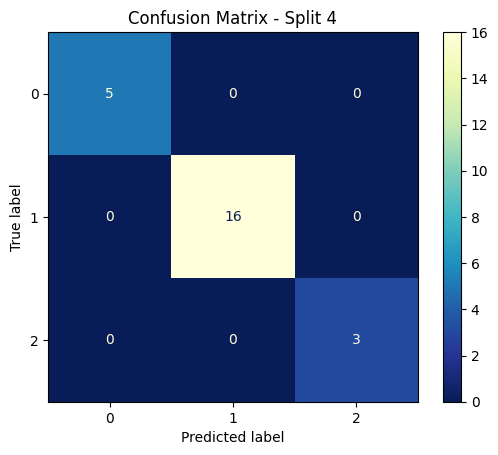

SPLIT ke - 5
Akurasi   : 78.2609%
Precision : 81.2698%
Recall    : 71.5278%
F1 score  : 68.8661%



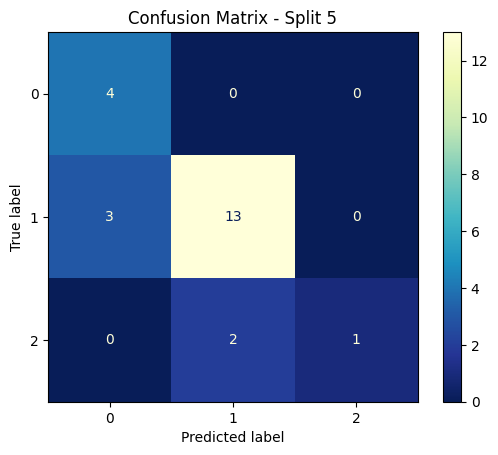

,Iteration,Accuracy,Precision,Recall,F1 score
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,0.956522,0.962540,0.943056,0.937732
std,1.581139,0.097220,0.083764,0.127332,0.139235
min,1.000000,0.782609,0.812698,0.715278,0.688661
25%,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
skf_score = []
skf_imps = []

for i, (train_index, test_index) in enumerate(kfold_split):
    print(f"SPLIT ke - {i+1}")
    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

    xgb = XGBClassifier(max_depth=5, random_state=0)
    xgb.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi   : {accuracy * 100:.4f}%")

    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision : {precision * 100:.4f}%")

    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall    : {recall * 100:.4f}%")

    f1_value = f1_score(y_test, y_pred, average="macro")
    print(f"F1 score  : {f1_value * 100:.4f}%")
    skf_score.append([i+1, accuracy, precision, recall, f1_value])
    print()

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="YlGnBu_r")
    plt.title(f"Confusion Matrix - Split {i+1}")
    plt.show()

    # Feature importance
    perm_importance = permutation_importance(xgb, X_test, y_test)
    skf_imps.append(pd.DataFrame([perm_importance.importances_mean], columns=X.columns))

skf_xgb = pd.DataFrame(skf_score, columns=["Iteration", "Accuracy", "Precision", "Recall", "F1 score"])
skf_xgb.describe()

In [ ]:
pd.concat(skf_imps).describe()

,Umur Harapan Hidup,Harapan Lama Sekolah,Rata-Rata Lama Sekolah,Pengeluaran Per Kapita
count,5.000000,5.000000,5.000000,5.000000
mean,0.013333,0.015000,0.152536,0.194058
std,0.018257,0.017078,0.130144,0.143824
min,0.000000,0.000000,0.033333,0.086957
25%,0.000000,0.000000,0.066667,0.091667
50%,0.000000,0.016667,0.075000,0.100000
75%,0.033333,0.016667,0.283333,0.291667
max,0.033333,0.041667,0.304348,0.400000


### XGboost Classification + Oversampling (ADASYN)

SPLIT ke - 1
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



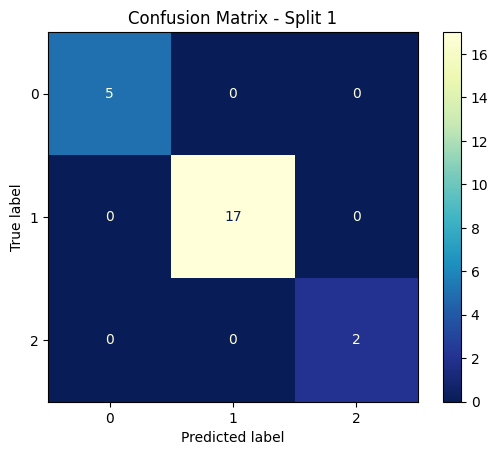

SPLIT ke - 2
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



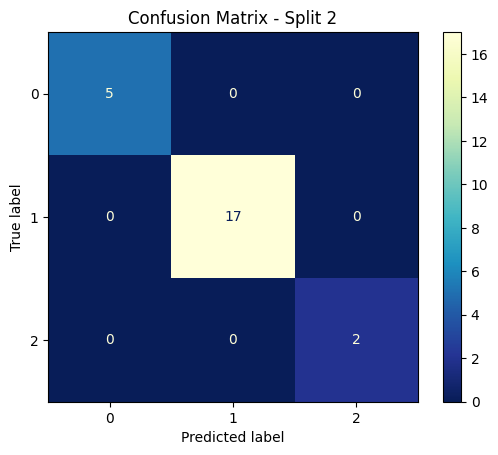

SPLIT ke - 3
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



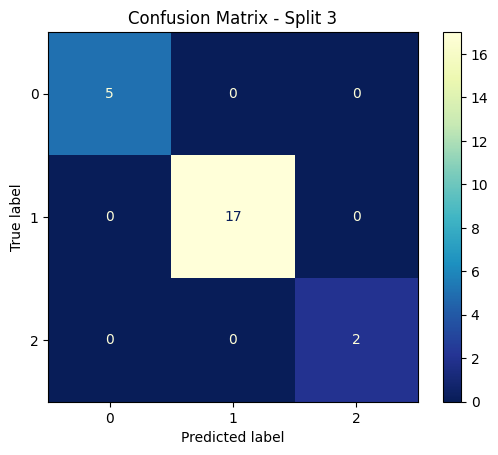

SPLIT ke - 4
Akurasi   : 100.0000%
Precision : 100.0000%
Recall    : 100.0000%
F1 score  : 100.0000%



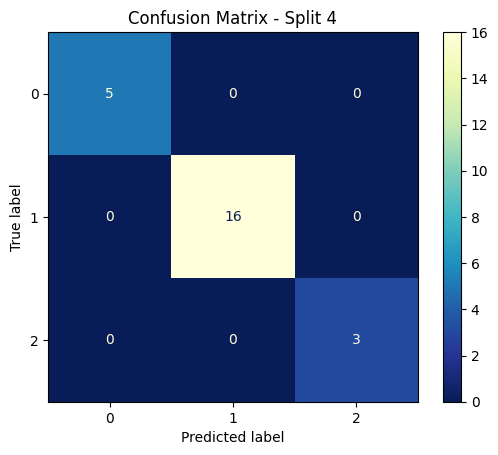

SPLIT ke - 5
Akurasi   : 78.2609%
Precision : 81.2698%
Recall    : 71.5278%
F1 score  : 68.8661%



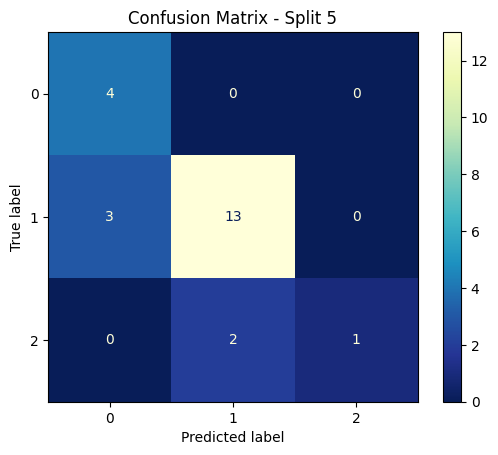

,Iteration,Accuracy,Precision,Recall,F1 score
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,0.956522,0.962540,0.943056,0.937732
std,1.581139,0.097220,0.083764,0.127332,0.139235
min,1.000000,0.782609,0.812698,0.715278,0.688661
25%,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
skf_score = []
skf_imps = []

for i, (train_index, test_index) in enumerate(kfold_split):
    print(f"SPLIT ke - {i+1}")
    ros = ADASYN(random_state=0)

    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

    X_train, y_train = ros.fit_resample(X_train, y_train)

    xgb = XGBClassifier(max_depth=5, random_state=0)
    xgb.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi   : {accuracy * 100:.4f}%")

    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision : {precision * 100:.4f}%")

    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall    : {recall * 100:.4f}%")

    f1_value = f1_score(y_test, y_pred, average="macro")
    print(f"F1 score  : {f1_value * 100:.4f}%")
    skf_score.append([i+1, accuracy, precision, recall, f1_value])
    print()

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="YlGnBu_r")
    plt.title(f"Confusion Matrix - Split {i+1}")
    plt.show()

    # Feature importance
    perm_importance = permutation_importance(xgb, X_test, y_test)
    skf_imps.append(pd.DataFrame([perm_importance.importances_mean], columns=X.columns))

skf_xgb_ov = pd.DataFrame(skf_score, columns=["Iteration", "Accuracy", "Precision", "Recall", "F1 score"])
skf_xgb_ov.describe()

<Axes: >

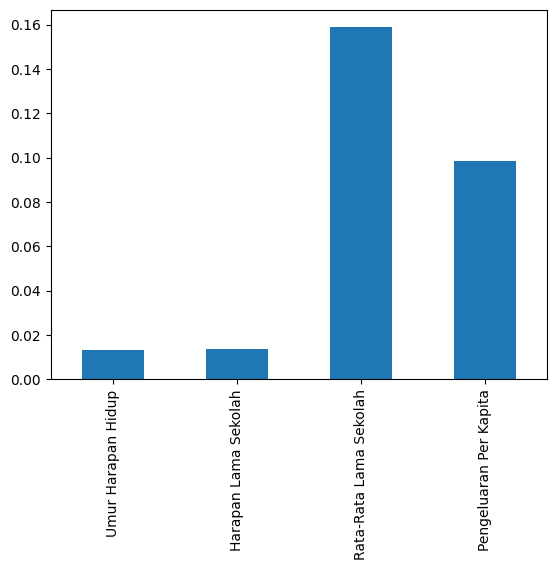

In [ ]:
pd.concat(skf_imps).mean().plot.bar()

### Comparison model

In [ ]:
results=pd.DataFrame({'Model':['Random Forest','Random Forest + Oversampling','XGBoost', 'XGboost + Oversampling'],
                    'Accuracy Score':[skf_rf["Accuracy"].mean(),skf_ov["Accuracy"].mean(),skf_xgb["Accuracy"].mean(), skf_xgb_ov["Accuracy"].mean()]})
comparison_df=results
comparison_df=comparison_df.set_index('Model')
comparison_df

,Accuracy Score
Model,
Random Forest,0.864130
Random Forest + Oversampling,0.889855
XGBoost,0.956522
XGboost + Oversampling,0.956522


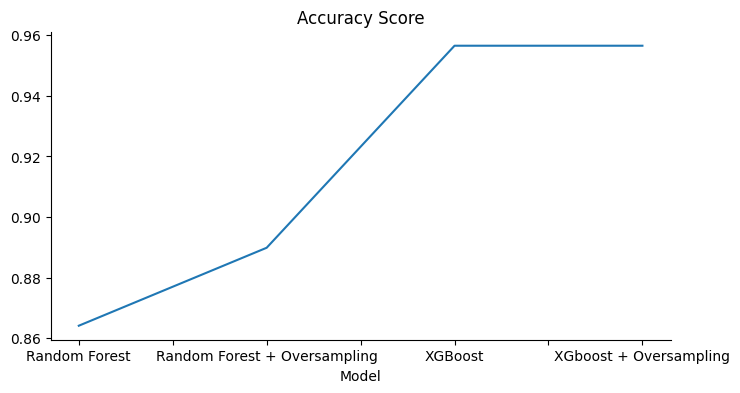

In [ ]:
# @title Accuracy Score

from matplotlib import pyplot as plt
comparison_df['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)